In [1]:
pip install statsmodels
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [1006]:
import numpy as np

In [1933]:
import pandas as pd
import matplotlib.pyplot as plt

In [1934]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [136]:
print('p-value: ', adfuller(y.diff(1).fillna(0))[1])

p-value:  0.0


In [137]:
print('p-value: ', adfuller(y.diff(1).diff(1).fillna(0))[1])

p-value:  2.8806952103410626e-15


Pruebo con diferenciación simple, pero el p-value baja demasiado rápido y no parece el mejor méotodo (no hace falta segunda diferenciación):

Parece mejor y más lógico el resultado con diferenciación cada 12 meses (diferenciación estacional):

In [150]:
print('p-value: ', adfuller(y.diff(12).dropna())[1])

p-value:  4.991299484142456e-05


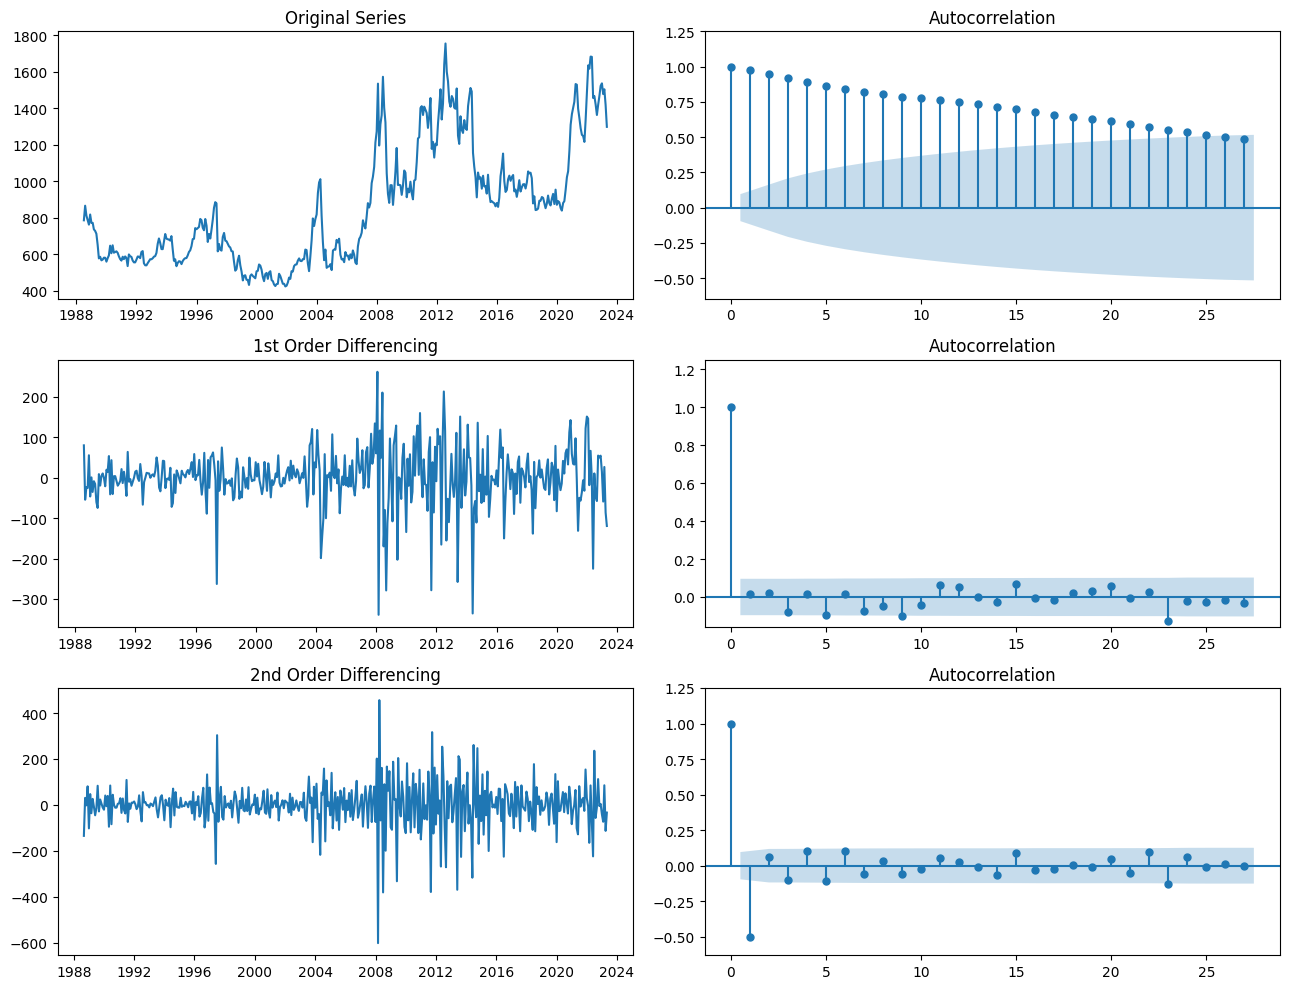

In [132]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(13,10))
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, auto_ylims=True,ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), auto_ylims=True,ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.diff().diff().dropna(), auto_ylims=True, ax=axes[2, 1])

plt.tight_layout()

Pruebo aplicar transformación logarítmica en función de la notebook de Tomi, pero obtengo prácticamente el mismo resultado que cuando hacía diferenciación directamente sin logaritmizar:

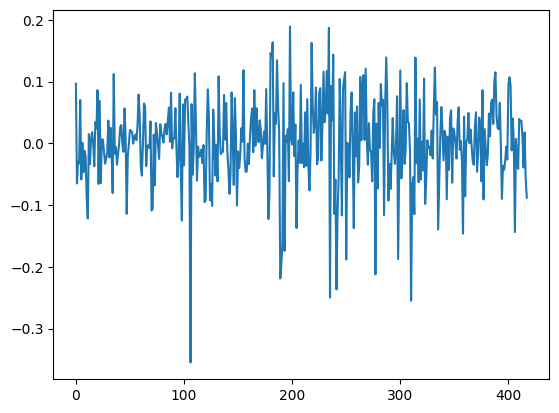

p-value: 0.000000


In [236]:
y_log = np.log(y)
y_log_diff = np.diff(y_log)
plt.plot(y_log_diff)
plt.show()

# Re-Chequeo Stationarity
result = adfuller(y_log_diff)
print('p-value: %f' % result[1])

Finalmente decido continuar con la opción de diferenciar vs el valor del mismo mes del año anterior, de esa manera obtengo un resultado más lógico:

In [151]:
y_diff_seasonal = y.diff(12).dropna()

In [152]:
result = adfuller(y_diff_seasonal)
print('p-value: %f' % result[1])

p-value: 0.000050


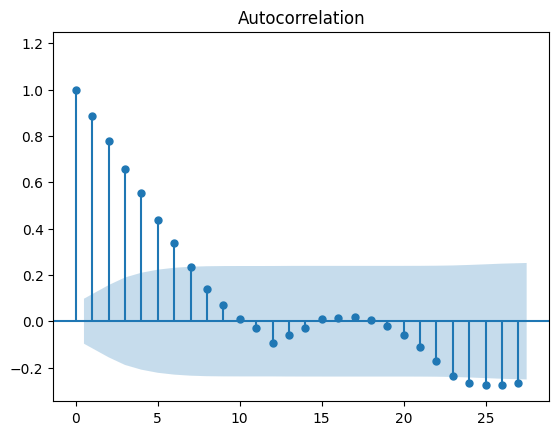

In [153]:
plot_acf(y_diff_seasonal, auto_ylims=True);

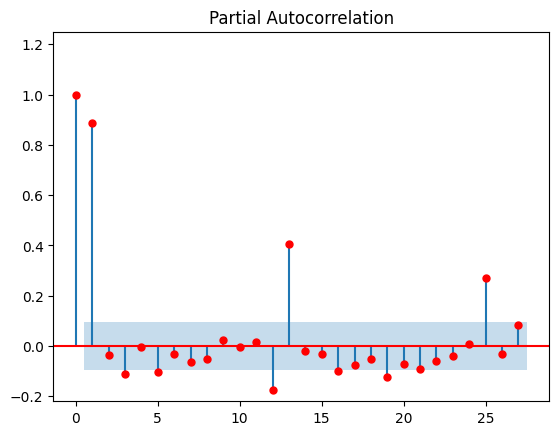

In [154]:
plot_pacf(y_diff_seasonal, method='ywm', auto_ylims=True, c='r');

#### Train-Test Split y análisis de train data

In [358]:
df_train = df[:'2017']
df_test = df['2017':]
print(df_train.shape)
print(df_test.shape)

(354, 2)
(77, 2)


In [359]:
from statsmodels.tsa.stattools import adfuller

print('p-value: ', adfuller(df_train["price"])[1])

p-value:  0.2147469297991792


p-value:  4.581342570356015e-05


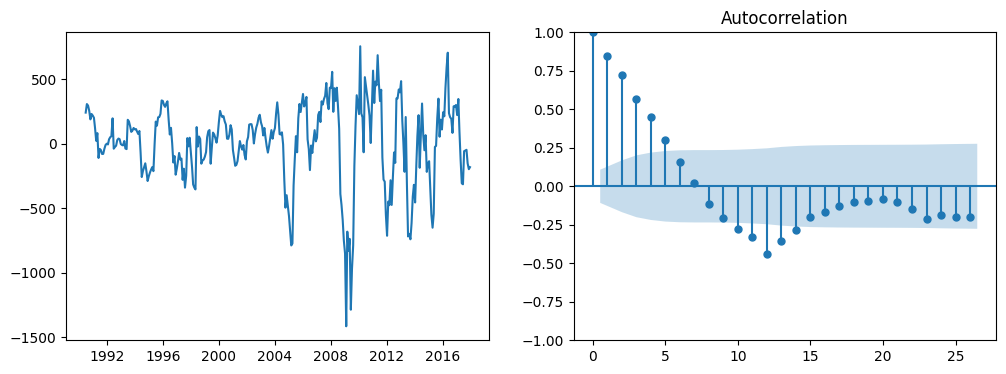

In [377]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

y_diff_12 = df_train.price.diff(12).diff(12).dropna() #D=2 y d=0, con d=1 q=0

axes[0].plot(y_diff_12)
plot_acf(y_diff_12, ax=axes[1])

print('p-value: ', adfuller(y_diff_12)[1])

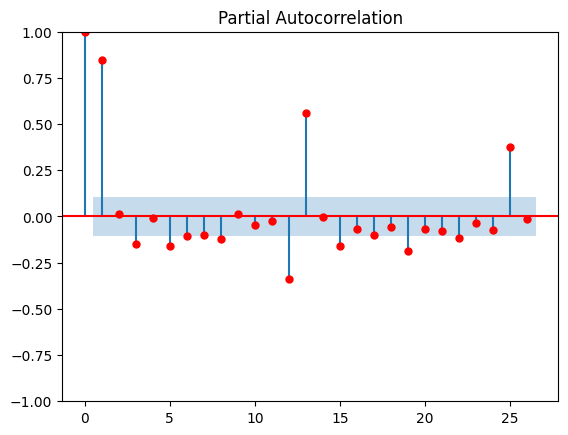

In [382]:
plot_pacf(y_diff_12, method='ywm',c='red');

In [383]:
model = pm.auto_arima(
    df_train['price'],
    m=12, # frequency of series. Important to choose manually
    seasonal=True,
    stepwise=True,  # only check the most interesting combination. False will take way longer.
    start_p=0, max_p=2,
    start_d=0, max_d=1,
    start_q=0, max_q=6,
    start_P=0, max_P=2,
    start_D=0, max_D=2,
    start_Q=0, max_Q=6,
    njobs=-1, trace=True, error_action='ignore',  suppress_warnings=True
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4008.071, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4011.304, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4011.295, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4006.088, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4009.621, Time=0.17 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4009.613, Time=0.23 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4011.575, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4009.782, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4009.776, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=4007.381, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.594 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  354
Model:               SARIMAX(0, 1, 0)   Log Likelih

In [1065]:
df_train=df[df.index<="2016-06-01"]
df_test=df[df.index>="2016-07-01"]

In [1066]:
print(df_train.shape)
print(df_test.shape)

(336, 2)
(83, 2)


In [1067]:
import pmdarima as pm

model = pm.auto_arima(
    df['price'],
    m=12, # frequency of series. Important to choose manually
    seasonal=True,
    stepwise=True,  # only check the most interesting combination. False will take way longer.
    start_p=0, max_p=2,
    start_d=0, max_d=1,
    start_q=0, max_q=2,
    start_P=0, max_P=2,
    start_D=0, max_D=2,
    start_Q=0, max_Q=2,
    njobs=-1, trace=True, error_action='ignore',  suppress_warnings=True
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4741.013, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4743.818, Time=0.98 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4743.775, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4739.141, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4741.870, Time=0.51 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4741.805, Time=1.17 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4743.626, Time=1.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4742.938, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4742.941, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=4744.926, Time=0.61 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 5.400 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  419
Model:               SARIMAX(0, 1, 0)   Log Likelih

In [1068]:
# Forecast
n_periods = len(df_test)
central, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
index_y_test = df_test.index #pd.date_range(df_test.index[-1], periods = n_periods, freq='MS')

# Make series for plotting purpose
central = pd.Series(central, index=index_y_test)
lower = pd.Series(conf_int[:, 0], index=index_y_test)
upper = pd.Series(conf_int[:, 1], index=index_y_test)

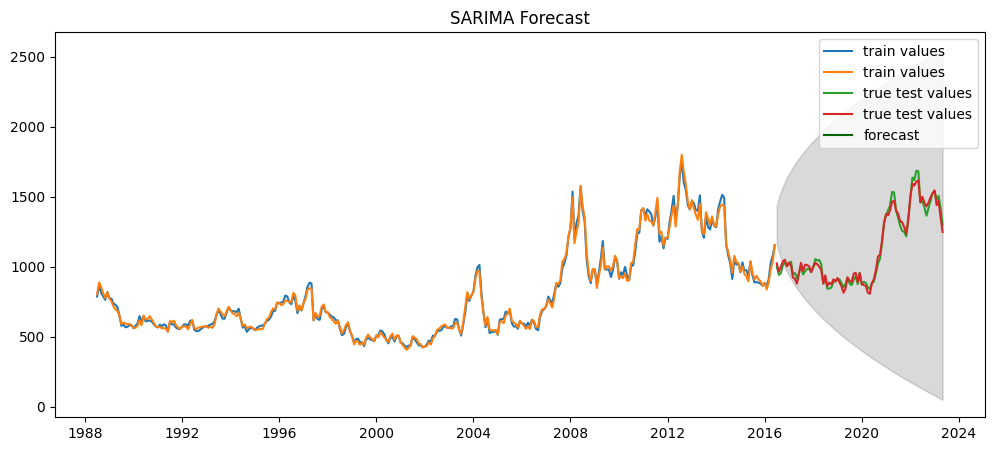

In [1069]:
# Plot
plt.figure(figsize=(12, 5), dpi=100)

plt.plot(df_train, label = "train values")
plt.plot(df_test, label = "true test values")
plt.plot(central, color='darkgreen',label = "forecast")

plt.fill_between(
    lower.index, 
    lower, 
    upper, 
    color='k', alpha=.15
)

plt.title("SARIMA Forecast")
plt.legend()
plt.show()

# CORN! ML Approach (1 month forecast horizon using Random Forest)

In [1765]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=20, random_state=0)

# CORN! ML Approach (1 month forecast horizon using Random Forest) with multiple features

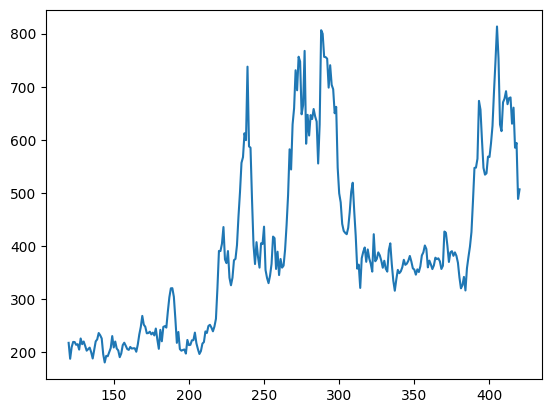

In [1817]:
df = pd.read_csv('Agricultural_data/consolidado_soycorn.csv', parse_dates=["date"] , header=0)
df=df[df["date"]>="1998-07-01"] #"2007-01-01"
y = df.price_corn
#df.set_index(["date"],inplace=True)

df["price_corn"].plot();

In [1818]:
df['date'] = pd.to_datetime(df['date']).dt.to_period('M')

In [1819]:
df.set_index(["date"],inplace=True)

In [1931]:
df.index

PeriodIndex(['1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12',
             '1999-01', '1999-02', '1999-03', '1999-04',
             ...
             '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
             '2023-11', '2023-12', '2024-01', '2024-02'],
            dtype='period[M]', name='date', length=308)

In [1821]:
#df = df.rename(columns={'SOYBEANS - USA PRODUCTION [mTons]': 'usa_prod'})

In [1822]:
# Add lagged values
df2 = df.copy()
for i in range(1, 13):
    df2[f'x_{i}'] = df["price_corn"].shift(i)

# Extract the trend using a well-chosen moving average
df2['ma_6'] = df2['price_corn'].rolling(window=6).mean()
df2['ma_3'] = df2['price_corn'].rolling(window=3).mean()
df2['ma_2'] = df2['price_corn'].rolling(window=2).mean()

df2["ewma_2"] = df2["price_corn"].ewm(halflife=2).mean()
df2["ewma_3"] = df2["price_corn"].ewm(halflife=3).mean()
df2["ewma_6"] = df2["price_corn"].ewm(halflife=6).mean()

# Drop nan by eliminating first 12 months
df2=df2[df2.index >= "1999-07-01"]

# create df_train and df_test 
df2_train = df2[df2.index<="2021-01-01"]
df2_test = df2[(df2.index>="2021-02-01") & (df2.index<="2023-07-01")]

In [1823]:
# Keep track of test_indexes
test_indexes = np.arange(len(df2_train), len(df2_train)+len(df2_test))
test_indexes

array([259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
       272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,
       285, 286, 287, 288])

Exploro features seleccionadas gráficamente para entender cuánto podrían aportar a la predicción de precio

In [1824]:
df2["SP500_scalated"]=df["SP500"]/np.mean(df.SP500)

In [1825]:
df2["price_scalated"]=df["price_corn"]/np.mean(df.price_corn)

In [1826]:
df2["usa_prod_scalated"]=df["usa_corn_prod"]/np.mean(df.usa_corn_prod)

In [1827]:
df2["real_interest_rate_scalated"]=df["real_interest_rate"]/np.mean(df.real_interest_rate)

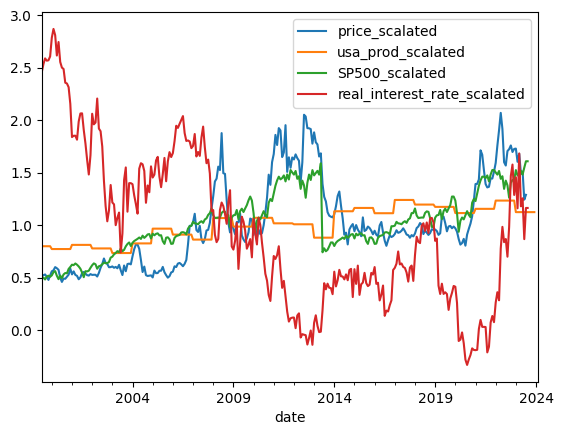

In [1828]:
df2[["price_scalated","usa_prod_scalated","SP500_scalated","real_interest_rate_scalated"]].plot();

In [1923]:
# Create X, y
df2=df2[df2.index<="2023-07-01"]
y = df2['price_corn']
X = df2[["x_1","x_2","x_3","x_4","x_5","x_6","x_7","x_8","x_9","x_10","x_11","x_12","ma_2","ma_3","ma_6","ewma_2","ewma_3","ewma_6","real_interest_rate","usa_corn_prod"]]

In [1924]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=20,random_state=12)

In [1925]:
# For each predictor, design a method to evaluate its performance on the test set:

def evaluate_performance_month_prediction(y_true, test_indexes, predictor, full_X):
    predictions = []
    ground_truth = []
    i = 0

    for _index in test_indexes:
        train_data = y_true[:_index]
        current_ground_truth = y_true[_index]
        current_ground_truth_features = full_X[_index,:]
        train_features = full_X[:_index]

        # train the model on all data points until (t-1) to predict (t)
        predictor.fit(train_features, train_data)
        prediction = predictor.predict(current_ground_truth_features.reshape(1,-1))[0]
        predictions.append(prediction)
        ground_truth.append(current_ground_truth)

        i += 1

    mape = np.mean(np.abs(np.array(predictions) - np.array(ground_truth))/np.abs(np.array(ground_truth)))

    return ground_truth, predictions, mape

In [1926]:
results = evaluate_performance_month_prediction(
    y.values,
    test_indexes=test_indexes,
    predictor=random_forest,
    full_X = X.values
)

In [1927]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer
def mape_score():
    mape = make_scorer(lambda y_true, y_pred: mean_absolute_percentage_error(y_true, y_pred))
    return mape

In [1928]:
print('Mean Absolute Prediction Error MAPE')
results[2]

Mean Absolute Prediction Error MAPE


0.04291124098227202

Está mal usar cross_val en esta ocasión considerando que se trata de una serie ordenada en el tiempo NO?

In [1929]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(random_forest,X,y,cv=5,scoring=mape_score(),n_jobs=-1).mean()
score

0.03789608051594222

Continúo

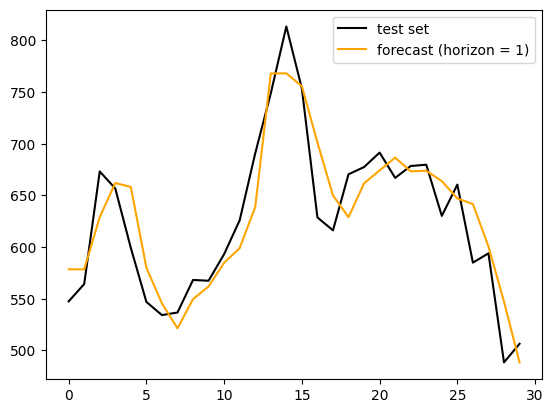

In [1930]:
plt.plot(results[0], c='black', label='test set')
plt.plot(results[1], c='orange', label='forecast (horizon = 1)')
plt.legend()

In [1738]:
# Extract the trend using a well-chosen moving average
df2['ma_6'] = df2['price_soybean'].shift(1).rolling(window=6).mean()
df2['ma_3'] = df2['price_soybean'].shift(1).rolling(window=3).mean()
df2['ma_2'] = df2['price_soybean'].shift(1).rolling(window=2).mean()# YOUR CODE HERE

<Axes: xlabel='date'>

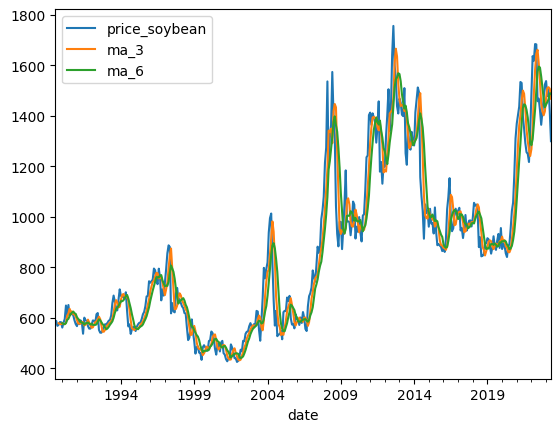

In [1739]:
df2[["price_soybean","ma_3", "ma_6"]].plot()

In [1740]:
df2["ewma_2"] = df2["price_soybean"].shift(1).ewm(halflife=2).mean()
df2["ewma_3"] = df2["price_soybean"].shift(1).ewm(halflife=3).mean()
df2["ewma_6"] = df2["price_soybean"].shift(1).ewm(halflife=6).mean()

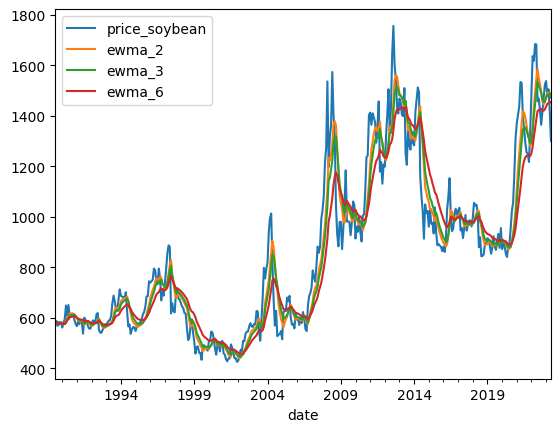

In [1741]:
df2[["price_soybean", "ewma_2", "ewma_3", "ewma_6"]].plot();

In [1742]:
random_forest = RandomForestRegressor(n_estimators=20, random_state=12)

features = [
    "ewma_2", "ewma_3", "ewma_6", "ma_2", "ma_3", "ma_6", "x_1",
    "x_2", "x_3", "x_4", "x_5", "x_6", "x_7", "x_8", "x_9", "x_10", "x_11", "x_12",
    "usa_prod","SP500"
]

new_features = df2[features].fillna(0).values

results = evaluate_performance_month_prediction(
    df2["price_soybean"].values,
    test_indexes=test_indexes,
    predictor=random_forest,
    full_X = new_features
)

In [1743]:
results[2]

0.0514084385243225

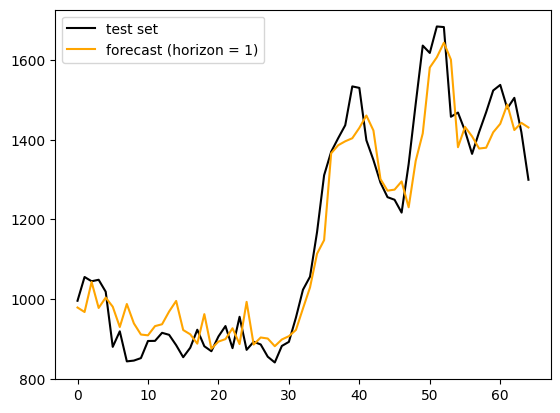

In [1744]:
plt.plot(results[0], c='black', label='test set')
plt.plot(results[1], c='orange', label='forecast (horizon = 1)')
plt.legend();

In [1745]:
importances = random_forest.feature_importances_
pd.DataFrame(zip(importances, features)).sort_values(by=0, ascending=False)

,0,1
6,0.783654,x_1
3,0.108916,ma_2
0,0.074039,ewma_2
19,0.006069,SP500
16,0.003480,x_11
17,0.002880,x_12
4,0.002319,ma_3
7,0.002269,x_2
11,0.002263,x_6
15,0.001967,x_10


In [1700]:
random_forest.fit(X[X.index<"2017-06-01"],y[y.index<"2017-06-01"])
a=random_forest.predict(X[X.index=="2017-06-01"])
a

array([948.9375])

In [1701]:
b=y[y.index=="2017-06-01"]
b

date
2017-06    954.75
Freq: M, Name: price_soybean, dtype: float64

In [1702]:
np.abs(a - b)/np.abs(b)

date
2017-06    0.006088
Freq: M, Name: price_soybean, dtype: float64

Pruebo a 3 meses

In [1452]:
def evaluate_performance_3month_prediction(y_true, test_indexes, predictor, full_X):
    predictions = []
    ground_truth = []
    i = 0

    for _index in test_indexes[0:-3]:
        train_data = y_true[:_index]
        current_ground_truth = y_true[_index:_index+3]
        current_ground_truth_features = full_X[_index:_index+3, :]
        train_features = full_X[:_index]
        
        # Train the model on all data points until (t-3) to predict (t), (t+1), (t+2)
        predictor.fit(train_features, train_data)
        prediction = predictor.predict(current_ground_truth_features)
        predictions.extend(prediction)
        ground_truth.extend(current_ground_truth)

        i += 1


    # Calculate MAPE
    mape = np.mean(np.abs(np.array(predictions) - np.array(ground_truth))/np.abs(np.array(ground_truth)))

    return ground_truth, predictions, mape

In [1453]:
results = evaluate_performance_3month_prediction(
    y.values,
    test_indexes=test_indexes,
    predictor=random_forest,
    full_X = new_features#X.values
)

In [1454]:
print('Mean Absolute Prediction Error MAPE')
results[2]

Mean Absolute Prediction Error MAPE


0.05269959722384576

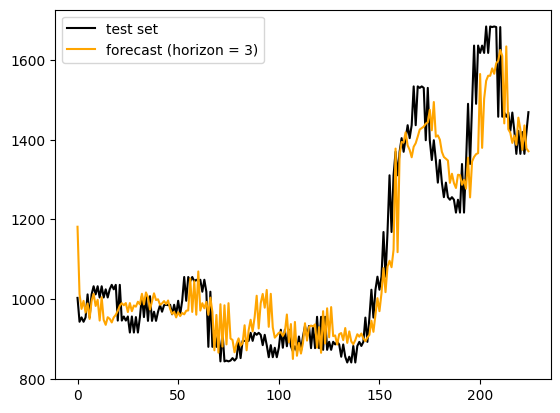

In [1441]:
plt.plot(results[0], c='black', label='test set')
plt.plot(results[1], c='orange', label='forecast (horizon = 3)')
plt.legend()

Pruebo a 6 meses

In [1442]:
def evaluate_performance_6month_prediction(y_true, test_indexes, predictor, full_X):
    predictions = []
    ground_truth = []
    i = 0

    for _index in test_indexes[0:-6]:
        train_data = y_true[:_index]
        current_ground_truth = y_true[_index:_index+6]
        current_ground_truth_features = full_X[_index:_index+6, :]
        train_features = full_X[:_index]

        # Train the model on all data points until (t-6) to predict (t), (t+1), (t+2), (t+3), (t+4) y (t+5)
        predictor.fit(train_features, train_data)
        prediction = predictor.predict(current_ground_truth_features)
        predictions.extend(prediction)
        ground_truth.extend(current_ground_truth)

        i += 1


    # Calculate MAPE
    mape = np.mean(np.abs(np.array(predictions) - np.array(ground_truth))/np.abs(np.array(ground_truth)))

    return ground_truth, predictions, mape

In [1443]:
results = evaluate_performance_6month_prediction(
    y.values,
    test_indexes=test_indexes,
    predictor=random_forest,
    full_X = new_features
)

In [1444]:
print('Mean Absolute Prediction Error MAPE')
results[2]

Mean Absolute Prediction Error MAPE


0.05365141092728904

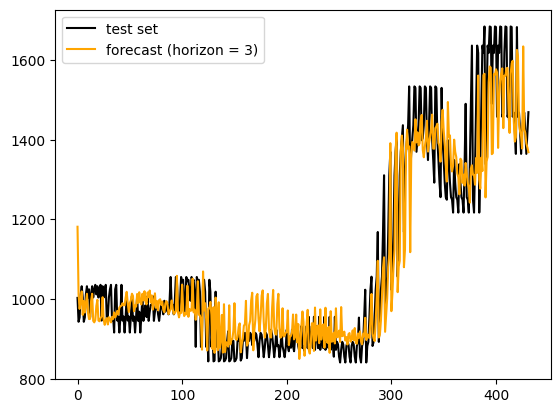

In [1445]:
plt.plot(results[0], c='black', label='test set')
plt.plot(results[1], c='orange', label='forecast (horizon = 3)')
plt.legend()